# Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from matplotlib.backends.backend_pdf import PdfPages

# Funciones

### Creacion de rangos

In [4]:
def calculate_T1(T2, T2start):
    T1 = (1/2)*((T2*T2start)/(T2start - T2))
    return T1

In [5]:
# Rangos para las graficas

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)


# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)
T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

### Lectura de archivos y calculos de promedios

In [6]:
def leer_json_y_convertir_a_np(path):
    
    dict_total = {}
    for carpeta in os.listdir(path):
        carpeta_path = os.path.join(path, carpeta)
        datos_np = []
        if os.path.isdir(carpeta_path):
            for archivo in os.listdir(carpeta_path):
                archivo_path = os.path.join(carpeta_path, archivo)
                if archivo.endswith('.json'):
                    with open(archivo_path, 'r') as f:
                        datos_json = json.load(f)
                        # Convertir lista de listas a arreglo numpy
                        datos_np.append(np.array(datos_json))
        #print(carpeta)
        dict_total[carpeta] = datos_np
    return dict_total

def promedio_y_desviacion(lista_de_arreglos):
    # Convertir la lista de arreglos en un solo arreglo numpy tridimensional
    arreglo_tridimensional = np.array(lista_de_arreglos)

    # Calcular el promedio y la desviación estándar elemento por elemento
    promedio = np.mean(arreglo_tridimensional, axis=0)
    desviacion_estandar = np.std(arreglo_tridimensional, axis=0)

    return promedio, desviacion_estandar

### Funciones para mostrar resultados

In [7]:
def make_plots_layers(path_pruebas, nick_name):
    # get arrays:
    Arreglos = []
    for path_i in path_pruebas:
        arreglos_npi = leer_json_y_convertir_a_np(path_i)
        Arreglos.append(arreglos_npi)

    # plot
    fig, axs = plt.subplots(3, 5, figsize=(20, 15))
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.subplots_adjust(wspace=0.33, hspace=0.45)
		
    titles_plots = ["FIDELITY", r"RENYI $\alpha=0.5$", r"RENYI $\alpha=2$", "TRACE", "VN"]
    titles_plotsj = ["FIDELITY", "RENYI_0_5", "RENYI_2", "TRACE", "VN"]
  
    # Crear carpeta si no existe
    carpeta_data = "results_of_test/test_6/results_AUC/"
    for j, ar in enumerate(Arreglos):
        for i, key in enumerate(ar.keys()):
            # Calcular el promedio y la desviación estándar para la clave actual
            A, B = promedio_y_desviacion(ar[key])

            # Graficar F_2d en el subplot actual
            img = axs[j, i].imshow(A, cmap='plasma', interpolation='nearest', origin='lower', vmin=0.5, vmax=1)

            # Agregar texto a cada celda
            for jj in range(len(T2_range)):
                for k in range(len(range_std)):
                    if A[jj, k] > 0.66:
                        axs[j, i].text(k, jj, np.round(A[jj, k], 2), ha='center', va='center', color='black', fontsize=8.5)
                    else:
                        axs[j, i].text(k, jj, np.round(A[jj, k], 2), ha='center', va='center', color='white', fontsize=8.5)

            axs[j, i].set_title(titles_plots[i])  # Agregar el título con la clave del diccionario
            axs[j, i].set_ylabel(r'$T_2 [\mu s]$', fontsize=11)
            axs[j, i].set_xlabel(r'$\sigma_{c} [T]$', fontsize=11)
            a = np.round(range_std, 3)[::-1]
            b = np.round(T2_range * 1e6, 3)[::-1]
            axs[j, i].set_xticks(range(len(range_std)), a, rotation=45)
            axs[j, i].set_yticks(range(len(T2_range * 1e6)), b)

    # Guardar la figura completa con todos los subplots en un archivo PDF
    ruta_subplots_completos = os.path.join(carpeta_data, f"{nick_name}_subplots_completos_test_6_.pdf")
    pdf_completo = PdfPages(ruta_subplots_completos)
    pdf_completo.savefig(fig)
    pdf_completo.close()

    plt.show()


In [8]:
def make_plots_layers_2(path_pruebas, nick_name):
    # get arrays:
    Arreglos = []
    for path_i in path_pruebas:
        arreglos_npi = leer_json_y_convertir_a_np(path_i)
        Arreglos.append(arreglos_npi)

    # Crear carpeta si no existe
    carpeta_data = "results_of_test/test_6/results_AUC/"
    if not os.path.exists(carpeta_data):
        os.makedirs(carpeta_data)

    # Iterar sobre los datos y guardar cada subplot individualmente
    for j, ar in enumerate(Arreglos):
        for i, key in enumerate(ar.keys()):
            # Calcular el promedio y la desviación estándar para la clave actual
            A, B = promedio_y_desviacion(ar[key])

            # Crear una nueva figura para cada subplot
            fig, ax = plt.subplots(figsize=(8, 8))

            # Graficar F_2d en el subplot actual
            img = ax.imshow(A, cmap='plasma', interpolation='nearest', origin='lower', vmin=0.5, vmax=1)

            # Agregar texto a cada celda
            for jj in range(len(T2_range)):
                for k in range(len(range_std)):
                    if A[jj, k] > 0.66:
                        ax.text(k, jj, np.round(A[jj, k], 2), ha='center', va='center', color='black')
                    else:
                        ax.text(k, jj, np.round(A[jj, k], 2), ha='center', va='center', color='white')

            #ax.set_title(key)  # Agregar el título con la clave del diccionario
            ax.set_ylabel(r'$T_2 [\mu s]$', fontsize=11)
            ax.set_xlabel(r'$\sigma_{c} [T]$', fontsize=11)
            a = np.round(range_std, 3)[::-1]
            b = np.round(T2_range * 1e6, 3)[::-1]
            ax.set_xticks(range(len(range_std)), a, rotation=45)
            ax.set_yticks(range(len(T2_range * 1e6)), b)

            # Guardar el subplot actual como una imagen individual en PDF
            ruta_subplots_individuales = os.path.join(carpeta_data, f'{nick_name}_subplot_{j}_{i}_test_6_.pdf')
            plt.savefig(ruta_subplots_individuales)
            plt.close()  # Cerrar la figura para liberar memoria

    plt.show()

### Funciones para hacer rankins

In [9]:
def get_row_auc(paths):
    Arreglos = []
    for path_i in paths:
        arreglos_npi = leer_json_y_convertir_a_np(path_i)
        Arreglos.append(arreglos_npi)
    
    mean_ACC = []  
    for j, ar in enumerate(Arreglos):
        for i, key in enumerate(ar.keys()):
            # Calcular el promedio y la desviación estándar para la clave actual
            #print(f"key = {key}")
            A, B = promedio_y_desviacion(ar[key])
            mean_ACC.append(A)
    return mean_ACC

def make_ranks( arrays ):
    #   Creamos un array vacío para almacenar los rankings    
    rankings = np.zeros((5, 10, 10), dtype=int)

    # Iteramos por cada posición i, j
    for i in range(10):
        for j in range(10):
            # Obtenemos los valores en la posición (i, j) de cada array
            values = [array[i, j] for array in arrays]
            # Ordenamos los valores y obtenemos los índices que ordenarían los valores
            sorted_indices = np.argsort(values)[::-1]  # [::-1] para orden descendente
            # Asignamos el ranking correspondiente a cada array
            for rank, index in enumerate(sorted_indices):
                rankings[index, i, j] = rank + 1
    return rankings

# Función para mostrar los arrays y sus rankings
def show_arrays_and_rankings(arrays, rankings, titles):
    fig, axs = plt.subplots(2, 5, figsize=(20, 10))

    for i in range(5):
        # Mostramos los arrays originales
        im = axs[0, i].imshow(arrays[i], cmap='viridis')
        axs[0, i].set_title(f'{titles[i]} Original')
        axs[0, i].axis('off')
        for x in range(10):
            for y in range(10):
                axs[0, i].text(y, x, f'{arrays[i][x, y]:.2f}', ha='center', va='center', color='white')
        
        # Mostramos los rankings
        im = axs[1, i].imshow(rankings[i], cmap='viridis', vmin=1, vmax=4)
        axs[1, i].set_title(f'{titles[i]} Rankings')
        axs[1, i].axis('off')
        for x in range(10):
            for y in range(10):
                axs[1, i].text(y, x, f'{rankings[i][x, y]}', ha='center', va='center', color='white')

    # Añadimos una barra de color para los rankings
    cbar = fig.colorbar(im, ax=axs[1, :], orientation='horizontal', fraction=0.02, pad=0.04)
    cbar.set_label('Ranking')

    plt.tight_layout()
    plt.show()

def export_array_to_json(array, path, filename):
    # Asegurarse de que el directorio existe
    if not os.path.exists(path):
        os.makedirs(path)
    
    # Convertir el arreglo de NumPy a una lista
    array_list = array.tolist()
    
    # Crear la ruta completa del archivo
    file_path = os.path.join(path, f"{filename}.json")
    
    # Exportar la lista como un archivo JSON
    with open(file_path, 'w') as json_file:
        json.dump(array_list, json_file)
    
    #print(f"Arreglo exportado a {file_path}")

def make_plots_layers_rankings(path_pruebas, nick_name):
    # get arrays:
    Arreglos = []
    for path_i in path_pruebas:
        mean_ACC =  get_row_auc(path_i)
        rankings = make_ranks(mean_ACC)
        Arreglos.append(rankings)

    # plot
    fig, axs = plt.subplots(3, 5, figsize=(20, 10))
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Times New Roman'


		# Ajustar el espacio entre subplots
    plt.subplots_adjust(wspace=0.05, hspace=0.5)
  
    # Crear carpeta si no existe
    carpeta_data = "results_of_test/test_6/results_rankin/"
    if not os.path.exists(carpeta_data):
        os.makedirs(carpeta_data)
    
    titles_plots = ["FIDELITY", r"RENYI $\alpha=0.5$", r"RENYI $\alpha=2$", "TRACE", "VN"]
    titles_plotsj = ["FIDELITY", "RENYI_0_5", "RENYI_2", "TRACE", "VN"]
    cmap_invertido = plt.cm.plasma.reversed()
    Layers = [3,5,10]
    for j, ar in enumerate(Arreglos):
        for i in range(5):
            # Calcular el promedio y la desviación estándar para la clave actual
            A = ar[i,:,:]
            
            # Exportar:
            export_array_to_json(A, "results_of_test/test_6/results_rankin/", f"{nick_name}_NL_{Layers[j]}_loss_{titles_plotsj[i]}")

            # Graficar F_2d en el subplot actual
            img = axs[j, i].imshow(A, cmap=cmap_invertido, interpolation='nearest', origin='lower', vmin=1, vmax=5)

            # Agregar texto a cada celda
            for jj in range(len(T2_range)):
                for k in range(len(range_std)):
                      axs[j, i].text(k, jj, A[jj, k], ha='center', va='center', color='black')

            axs[j, i].set_title(titles_plots[i])  # Agregar el título con la clave del diccionario
            axs[j, i].set_ylabel(r'$T_2 [\mu s]$', fontsize=11)
            axs[j, i].set_xlabel(r'$\sigma_{c} [T]$', fontsize=11)
            a = np.round(range_std, 3)[::-1]
            b = np.round(T2_range * 1e6, 3)[::-1]
            axs[j, i].set_xticks(range(len(range_std)), a, rotation=45)
            axs[j, i].set_yticks(range(len(T2_range * 1e6)), b)

    # Guardar la figura completa con todos los subplots en un archivo PDF
    ruta_subplots_completos = os.path.join(carpeta_data, f"{nick_name}_subplots_completos_test_6_.pdf")
    pdf_completo = PdfPages(ruta_subplots_completos)
    pdf_completo.savefig(fig)
    pdf_completo.close()
    plt.show()

In [10]:
# Títulos para los gráficos
titles = ['Fidelity', r'Renyi $\alpha=1/2$', r'Renyi $\alpha=2$', 'Trace distance', "Von Neumman"]

paths = ['results_of_test/test_5/results_of_benchmarks/resultados_1q_kaggle/3Layers']

# 1 Qubit

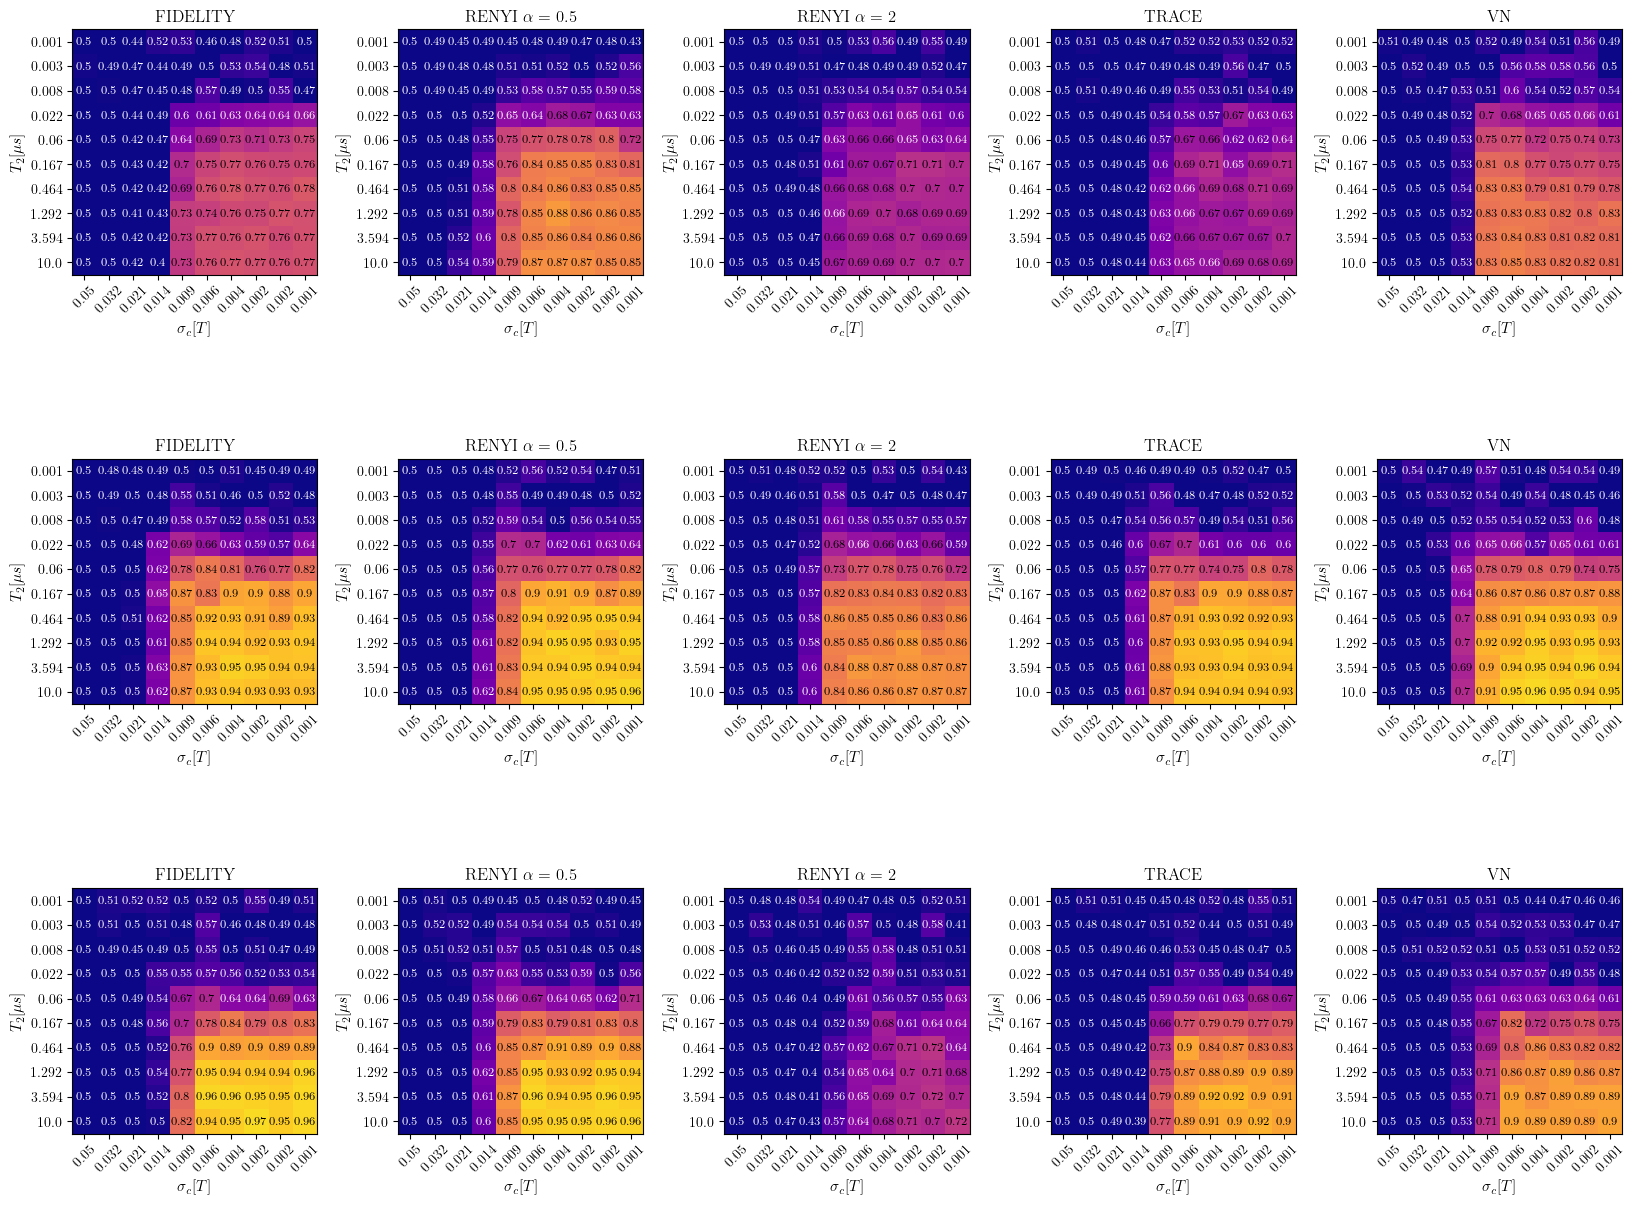

In [86]:
# 1Q:
paths = ['resultados_1q_kaggle/3Layers/', 
         'resultados_1q_kaggle/5Layers/',
        'resultados_1q_kaggle/10Layers/' ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [path_relative + path_i for path_i in paths]

make_plots_layers(paths, "1q")
#make_plots_layers_2(paths, "1q")

[['results_of_test/test_5/results_of_benchmarks/resultados_1q_kaggle/3Layers/'], ['results_of_test/test_5/results_of_benchmarks/resultados_1q_kaggle/5Layers/'], ['results_of_test/test_5/results_of_benchmarks/resultados_1q_kaggle/10Layers/']]


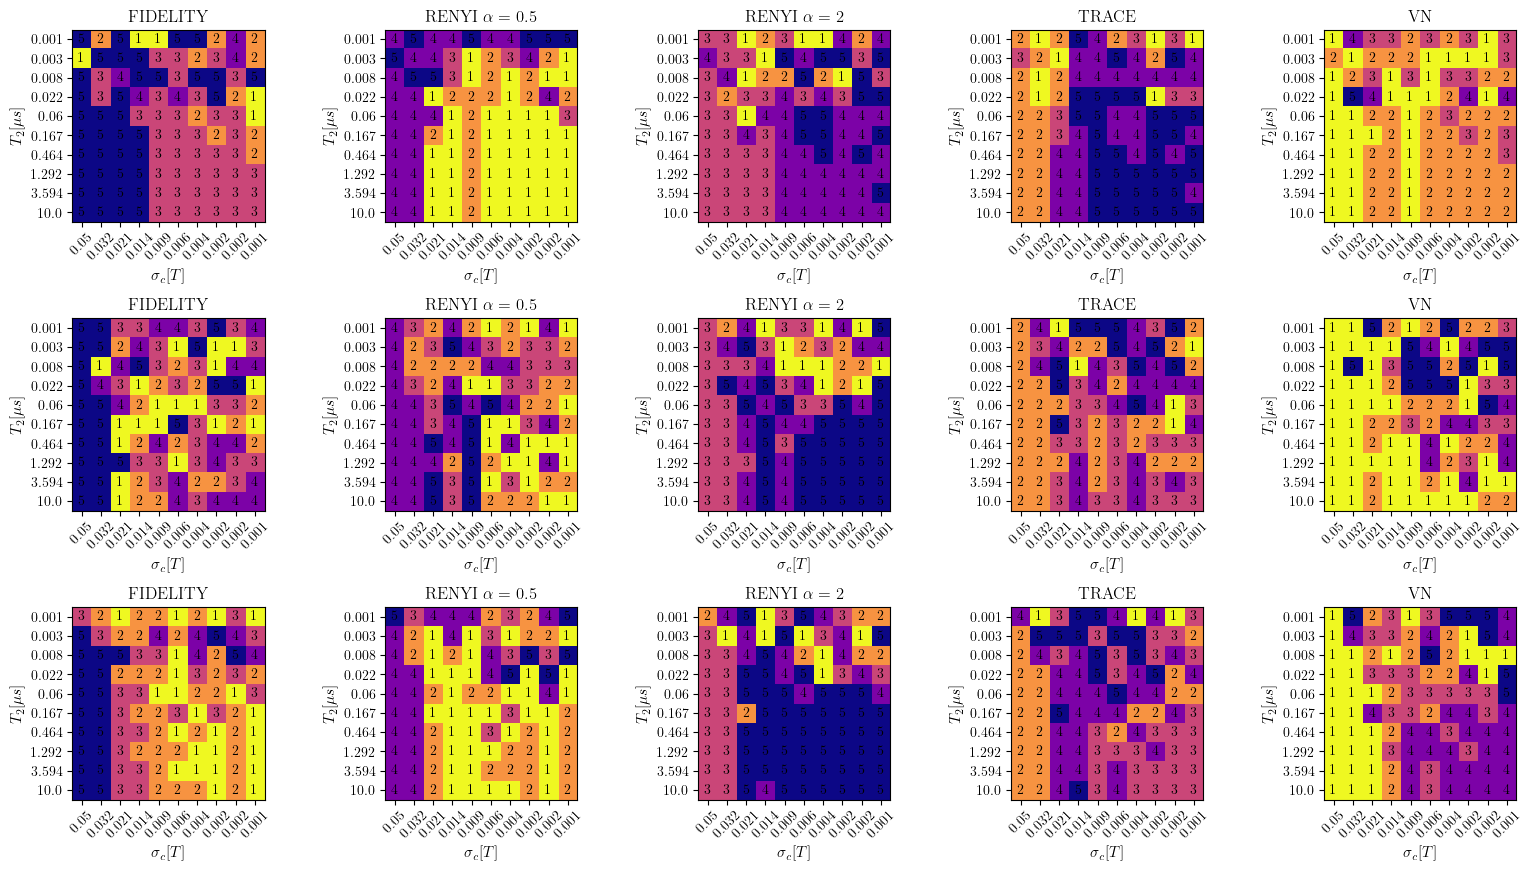

In [12]:
# 1Q:
paths = [ ['resultados_1q_kaggle/3Layers/'], 
         ['resultados_1q_kaggle/5Layers/'],
         ['resultados_1q_kaggle/10Layers/'] ]


path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [[path_relative + path_i[0]] for path_i in paths]

print(paths)

make_plots_layers_rankings(paths, "1q")

# 2 Qubits

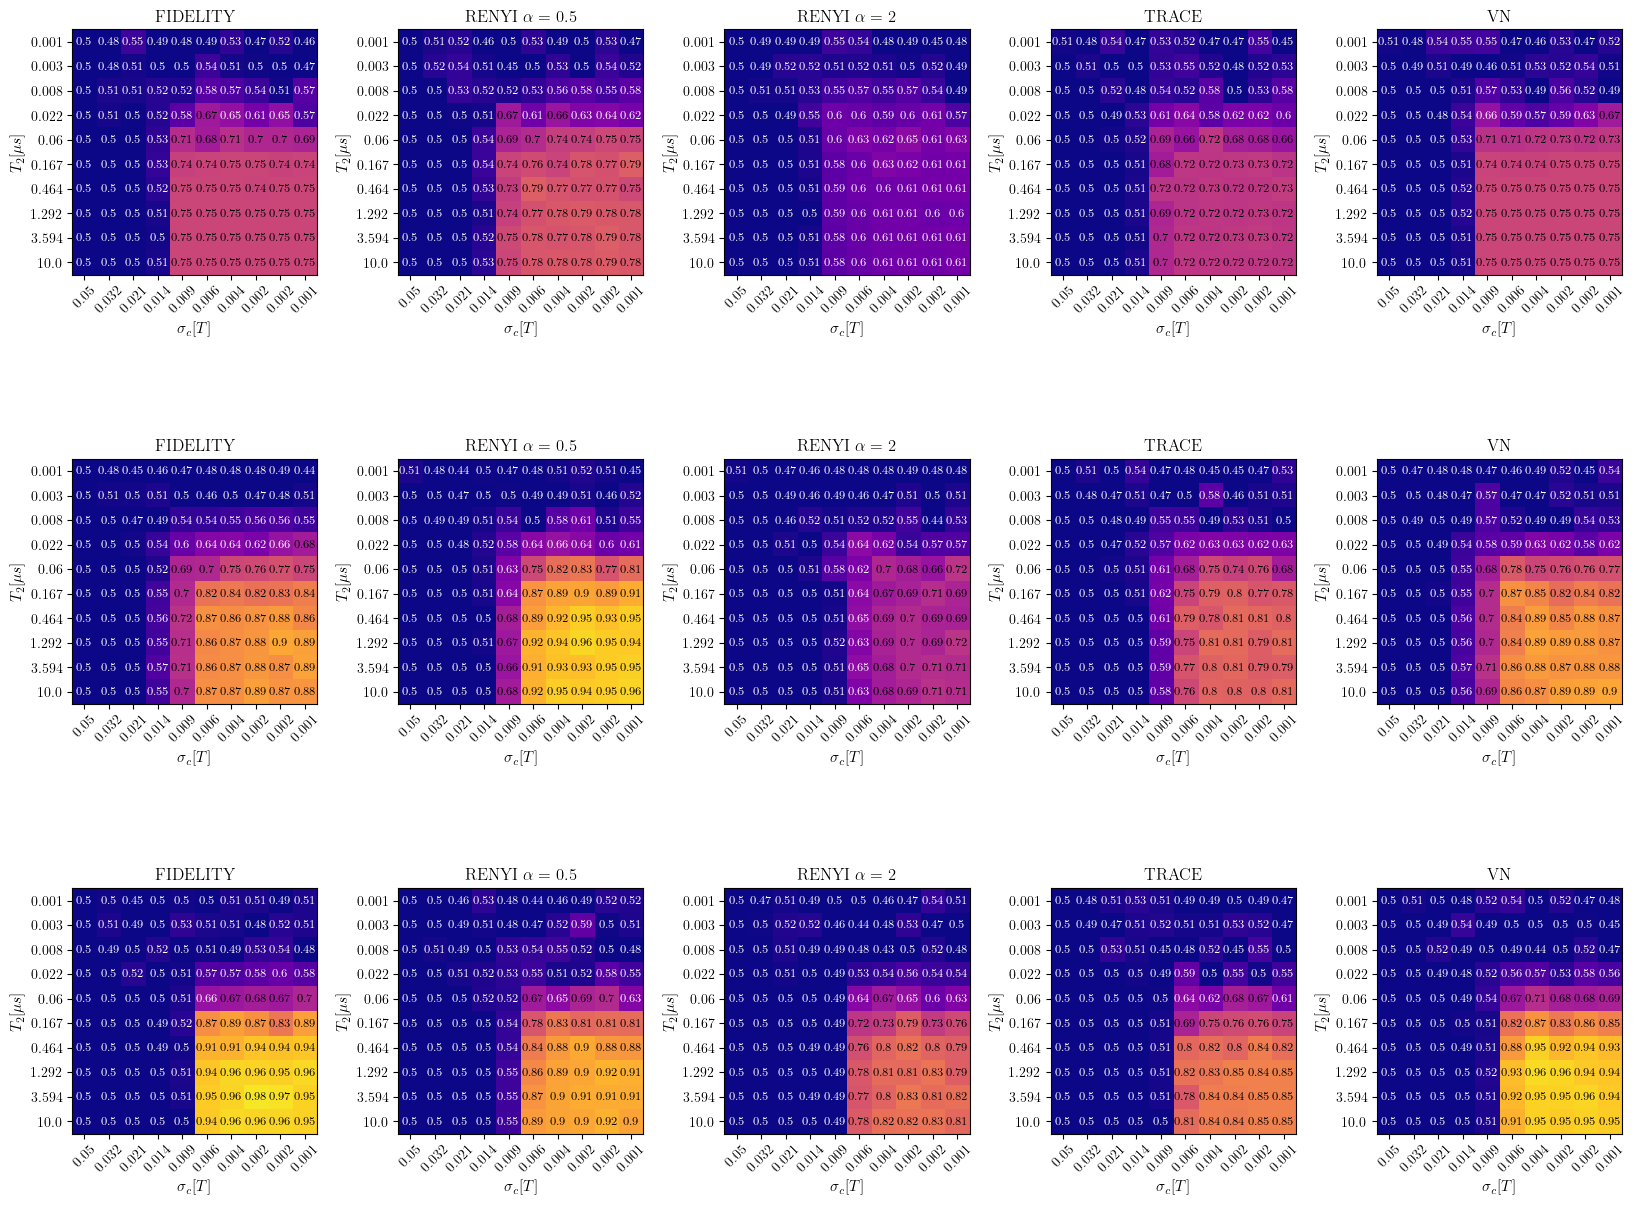

In [88]:
# 2Q:
paths = ['resultados_2q_kaggle/3Layers/', 
         'resultados_2q_kaggle/5Layers/',
        'resultados_2q_kaggle/10Layers/' ]


path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [path_relative + path_i for path_i in paths]

make_plots_layers(paths, "2q")
make_plots_layers_2(paths, "2q")

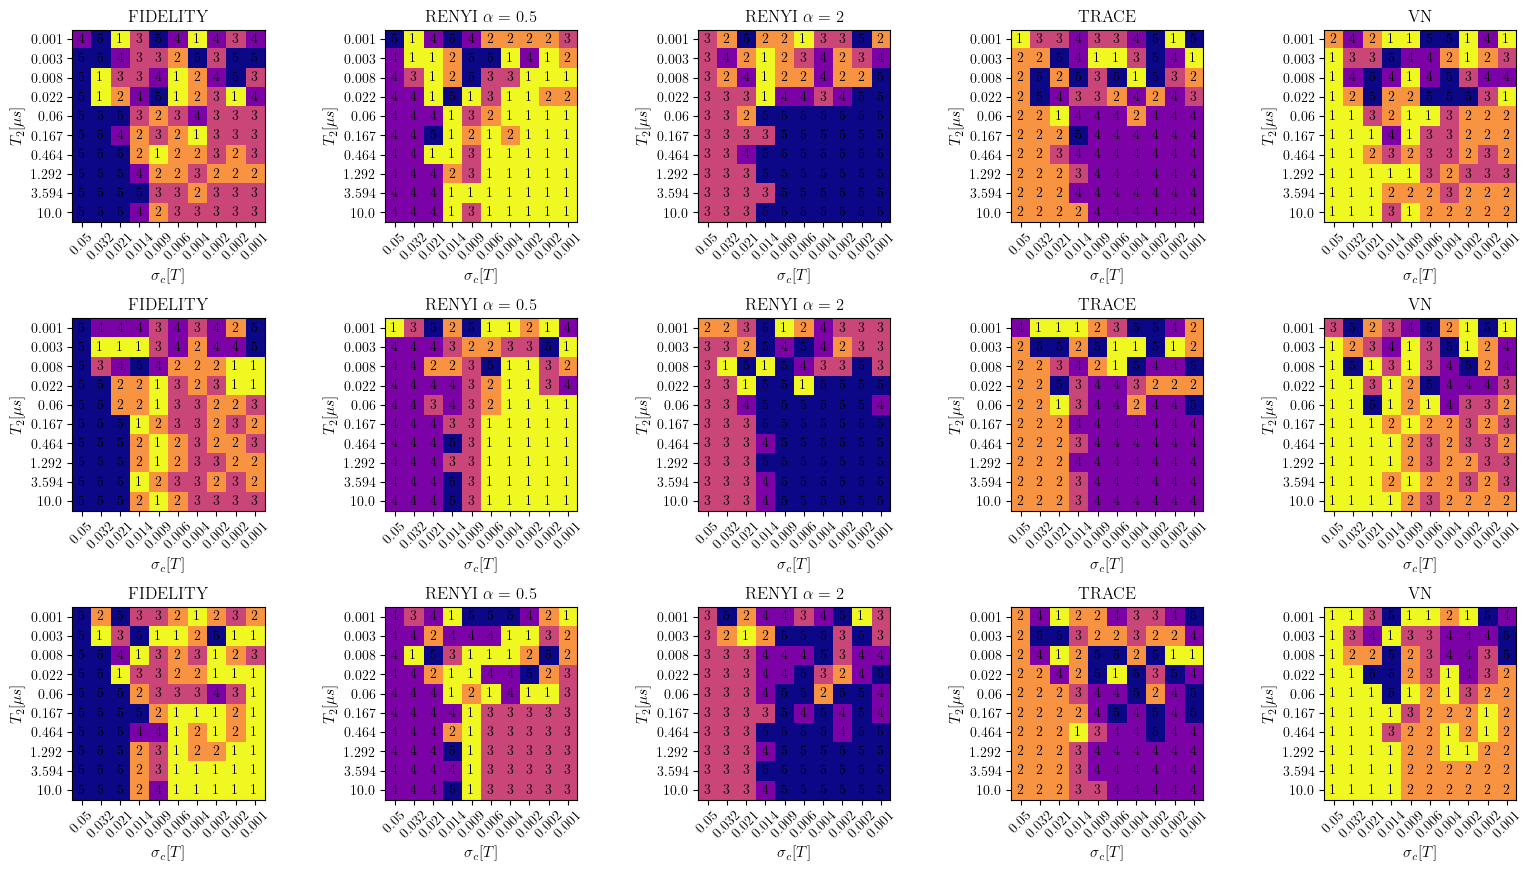

In [13]:
# 2Q:
paths = [['resultados_2q_kaggle/3Layers/'], 
         ['resultados_2q_kaggle/5Layers/'],
        ['resultados_2q_kaggle/10Layers/'] ]


path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [[path_relative + path_i[0]] for path_i in paths]

make_plots_layers_rankings(paths, "2q")

# 2Q - entanglement

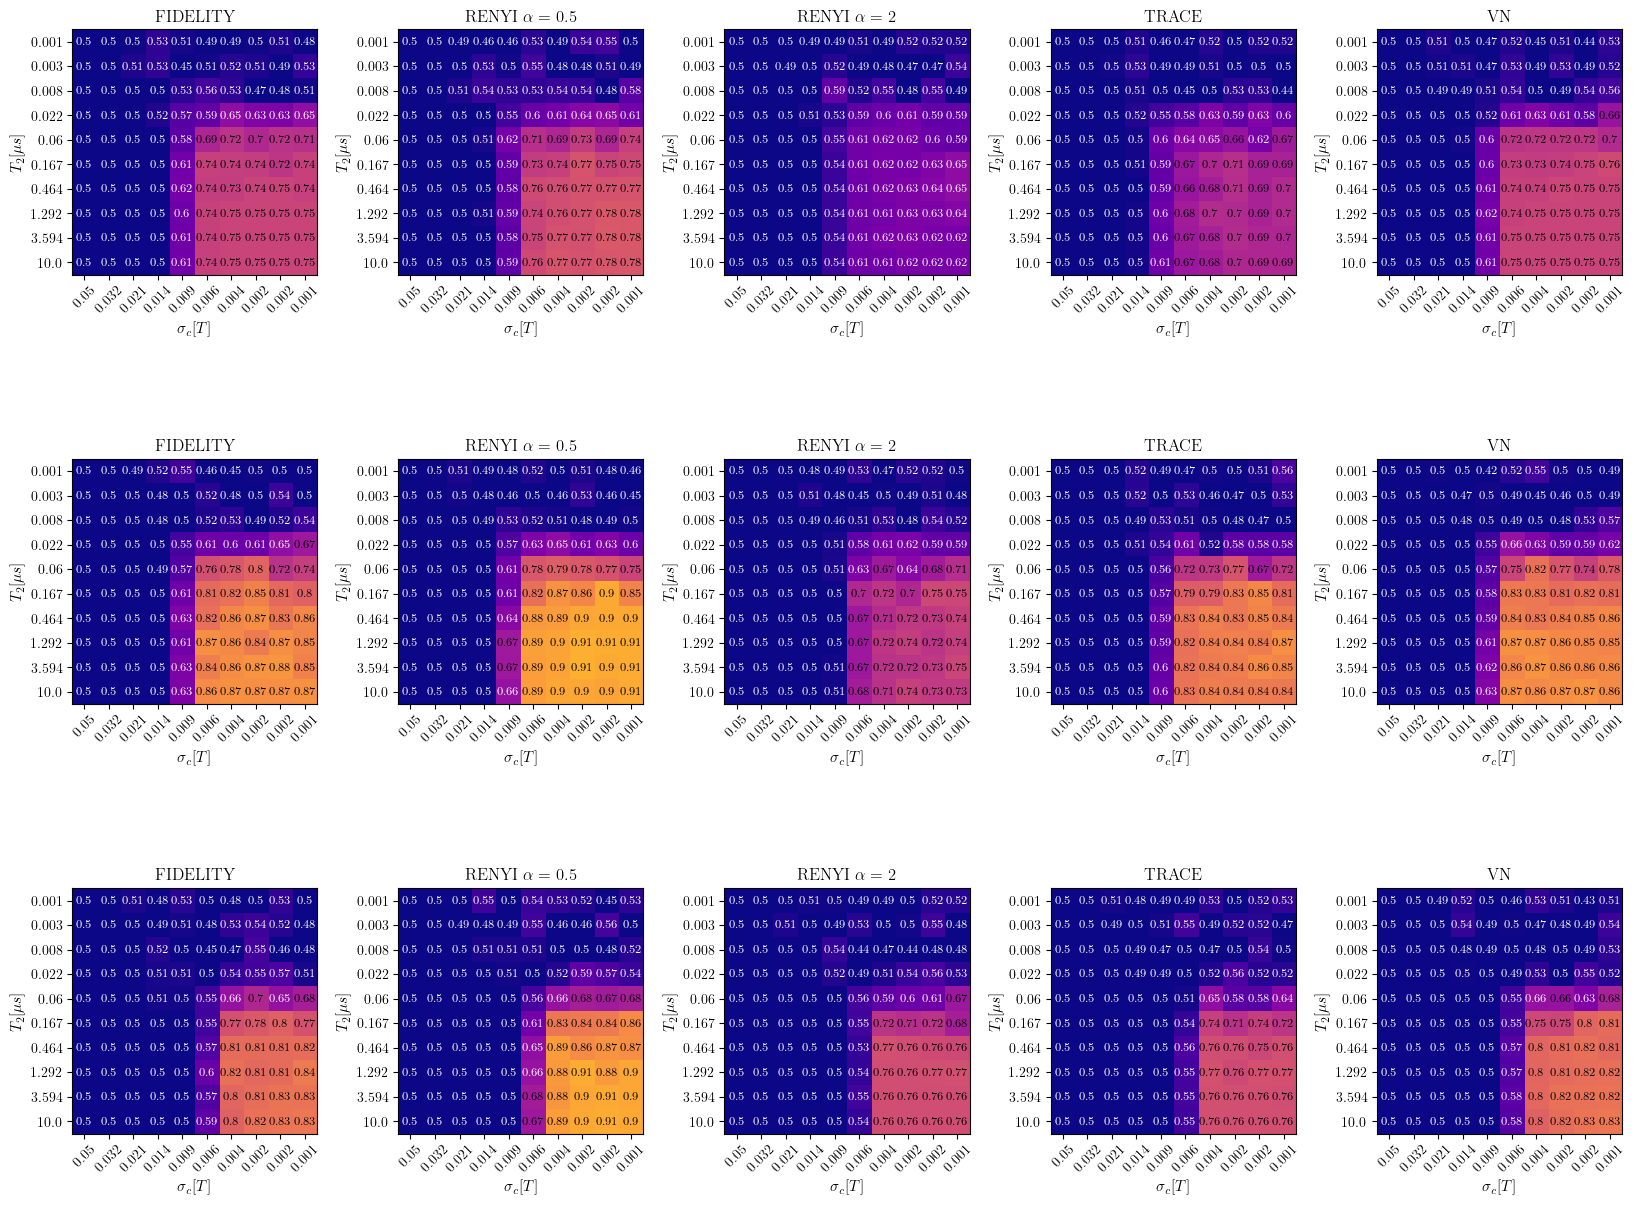

In [90]:
# 2Q-e:
paths = ['resultados_2q_kaggle_entenglament/3Layers/', 
         'resultados_2q_kaggle_entenglament/5Layers/',
         'resultados_2q_kaggle_entenglament/10Layers/']

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [path_relative + path_i for path_i in paths]

make_plots_layers(paths, "2qe")
make_plots_layers_2(paths, "2qe")

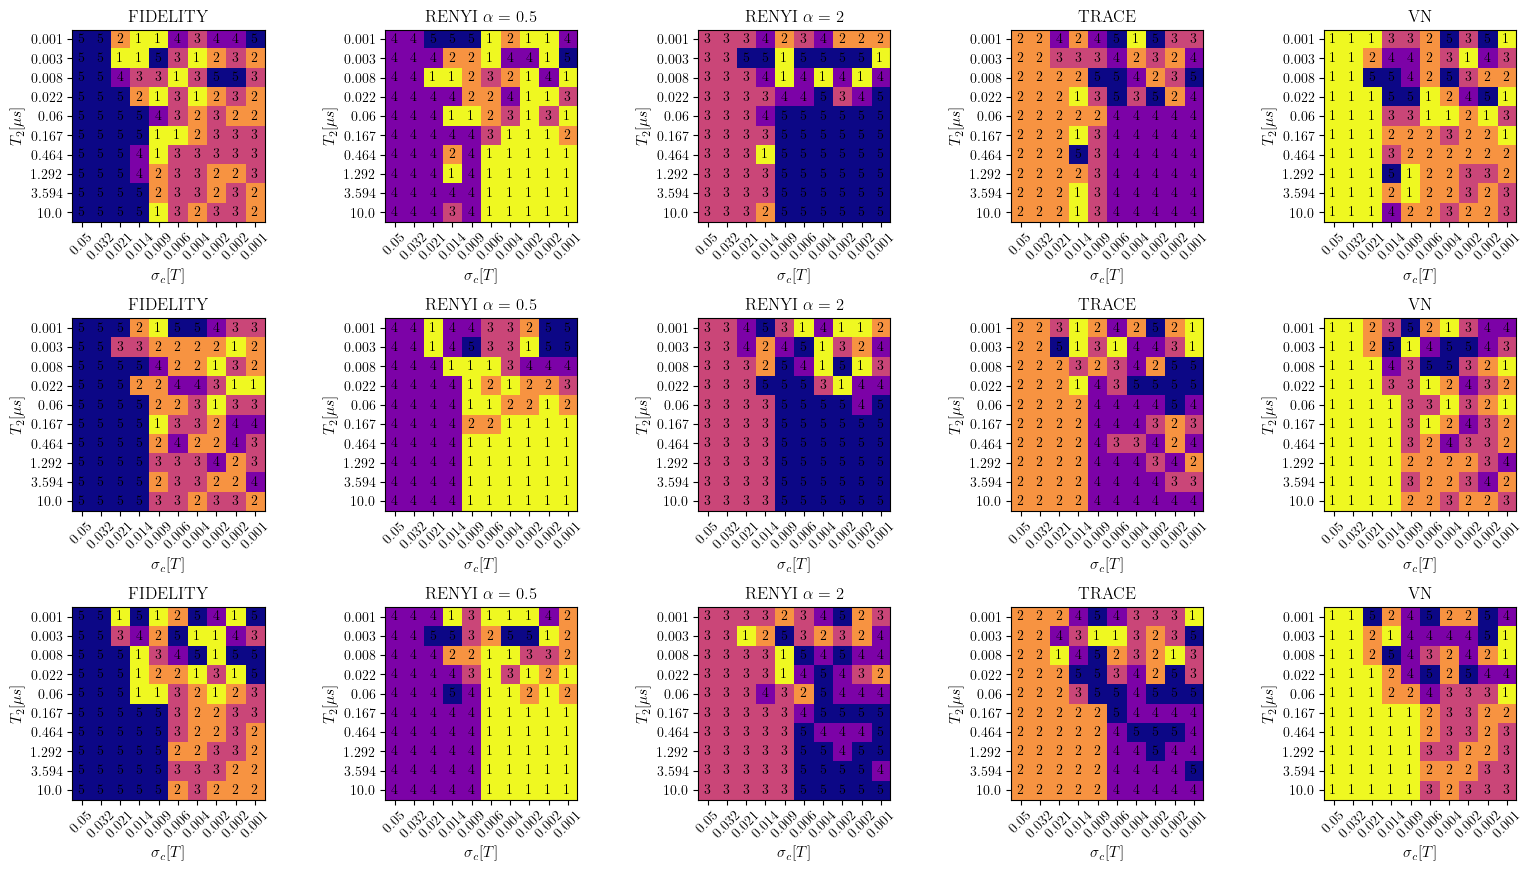

In [14]:
# 2Q-e:
paths = [['resultados_2q_kaggle_entenglament/3Layers/'], 
         ['resultados_2q_kaggle_entenglament/5Layers/'],
        ['resultados_2q_kaggle_entenglament/10Layers/'] ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [[path_relative + path_i[0]] for path_i in paths]

make_plots_layers_rankings(paths, "2qe")

# 4 Qubits

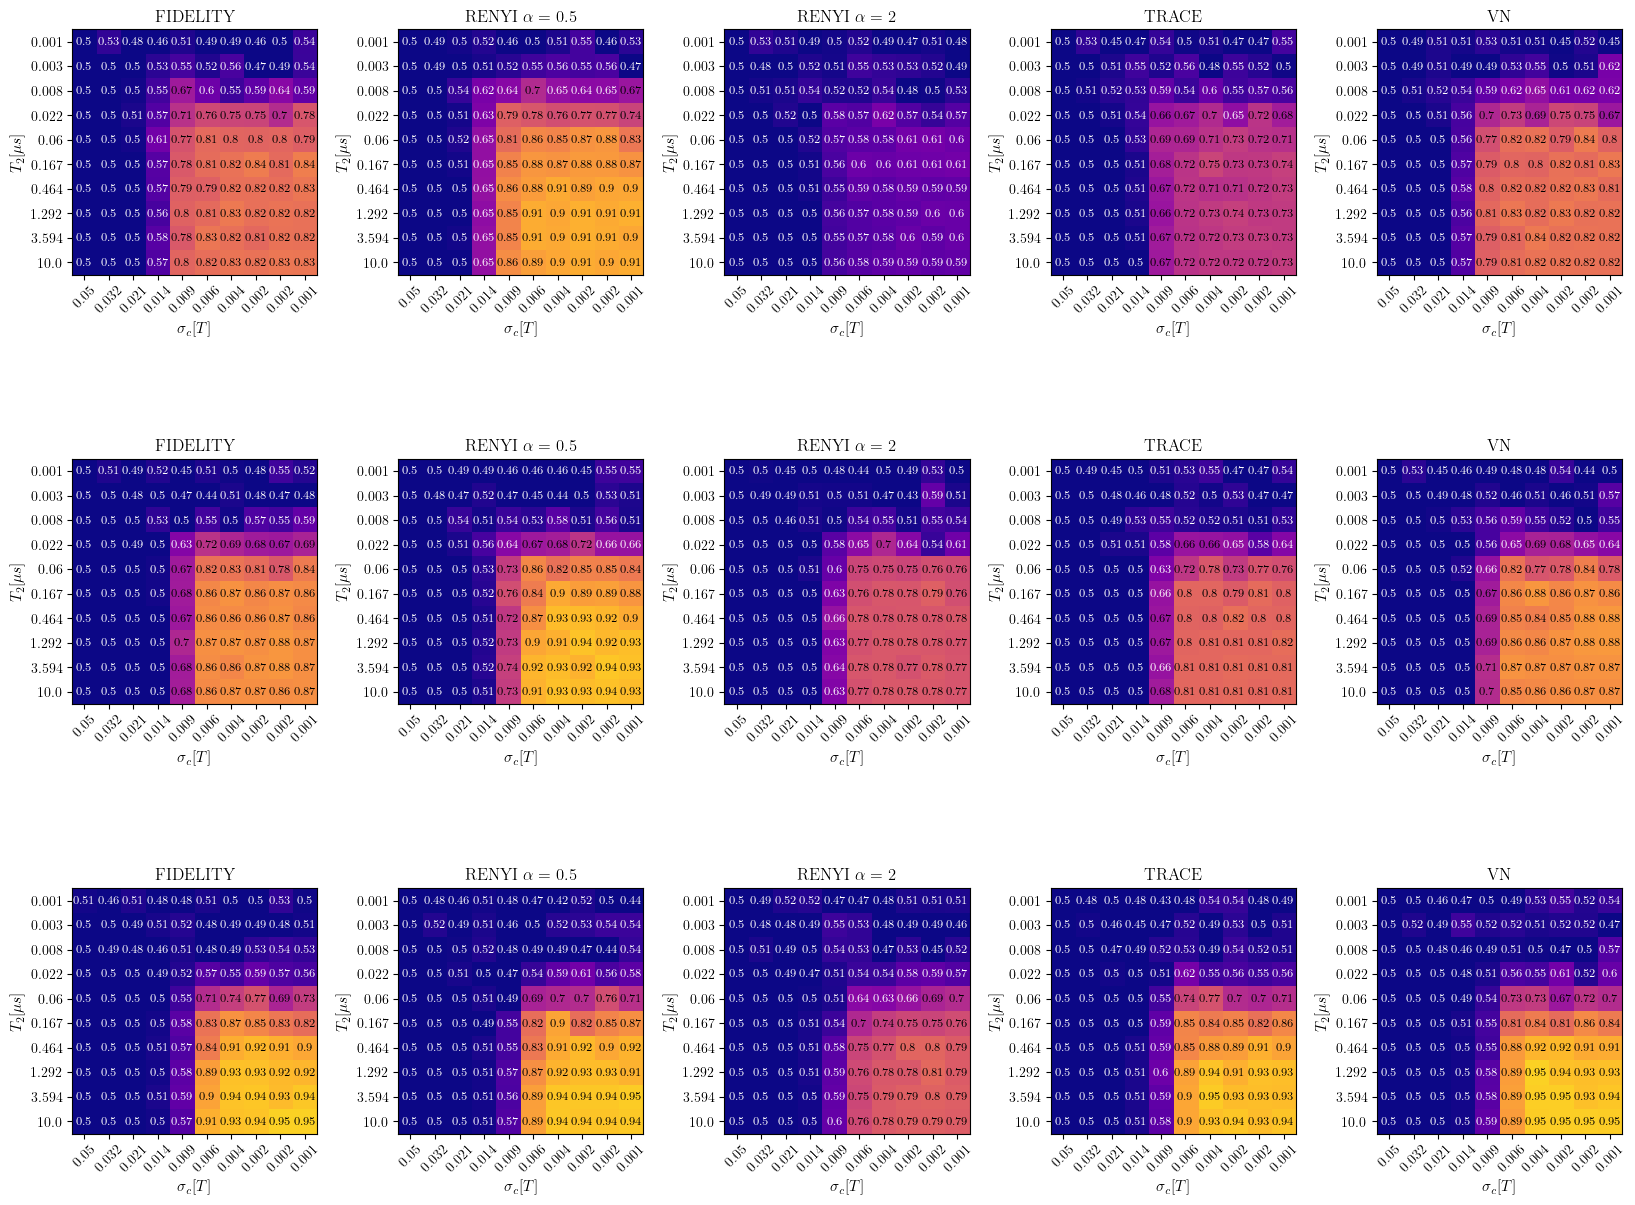

In [92]:
# 4Q:
paths = ['resultados_4q_kaggle/3Layers/' ,
         'resultados_4q_kaggle/5Layers/' ,
         'resultados_4q_kaggle/10Layers/' ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [path_relative + path_i for path_i in paths]

make_plots_layers(paths, "4q")
make_plots_layers_2(paths, "4q")

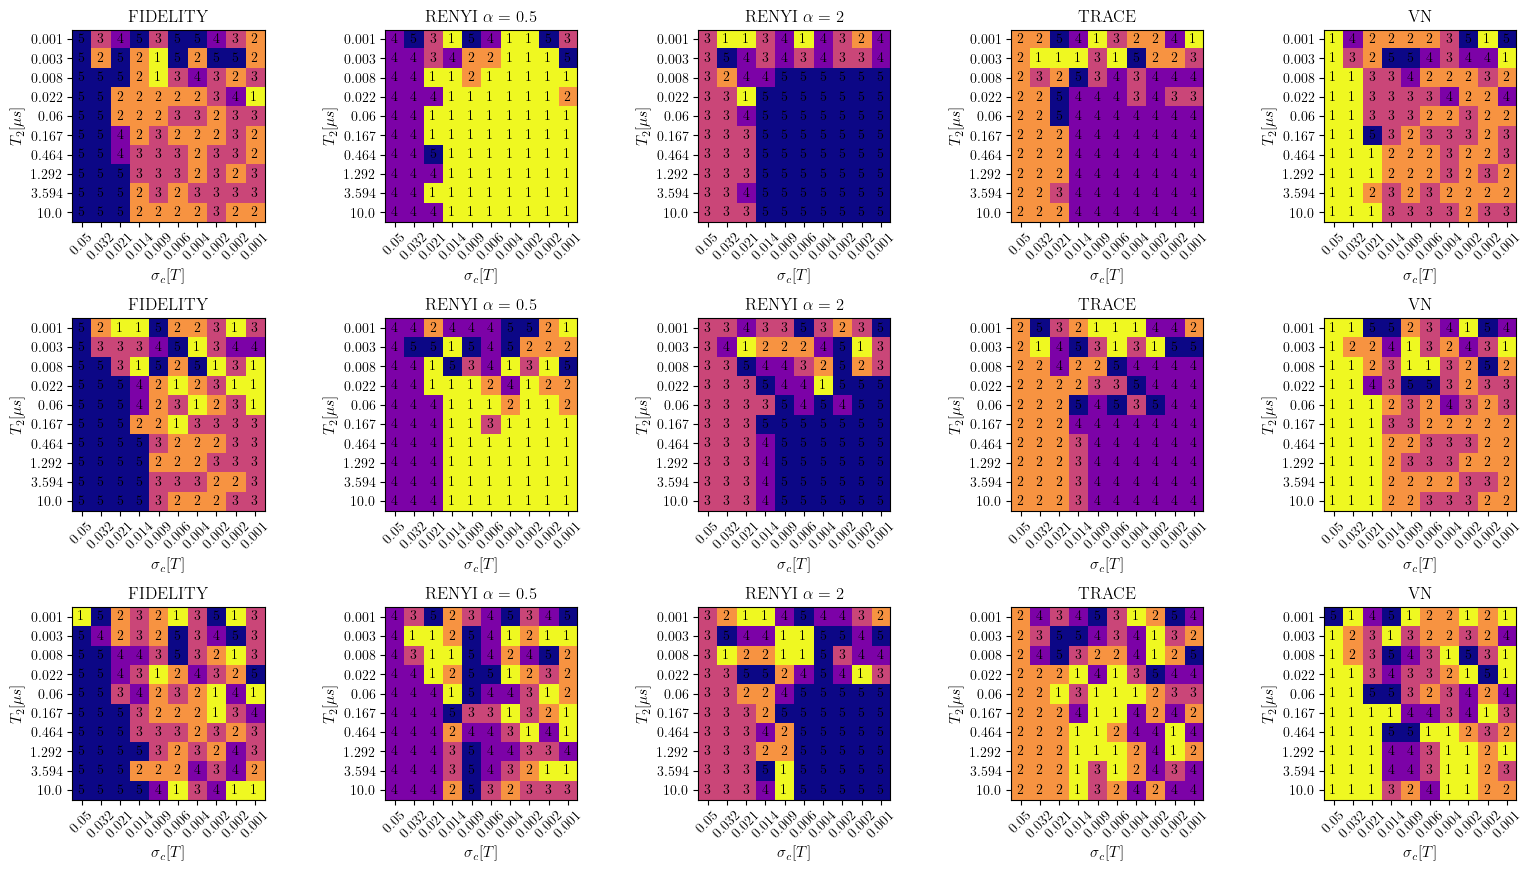

In [15]:
# 4Q-e:
paths = [['resultados_4q_kaggle/3Layers/'], 
         ['resultados_4q_kaggle/5Layers/'],
        ['resultados_4q_kaggle/10Layers/'] ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [[path_relative + path_i[0]] for path_i in paths]

make_plots_layers_rankings(paths, "4q")

# 4 Qubits - entrelazamiento

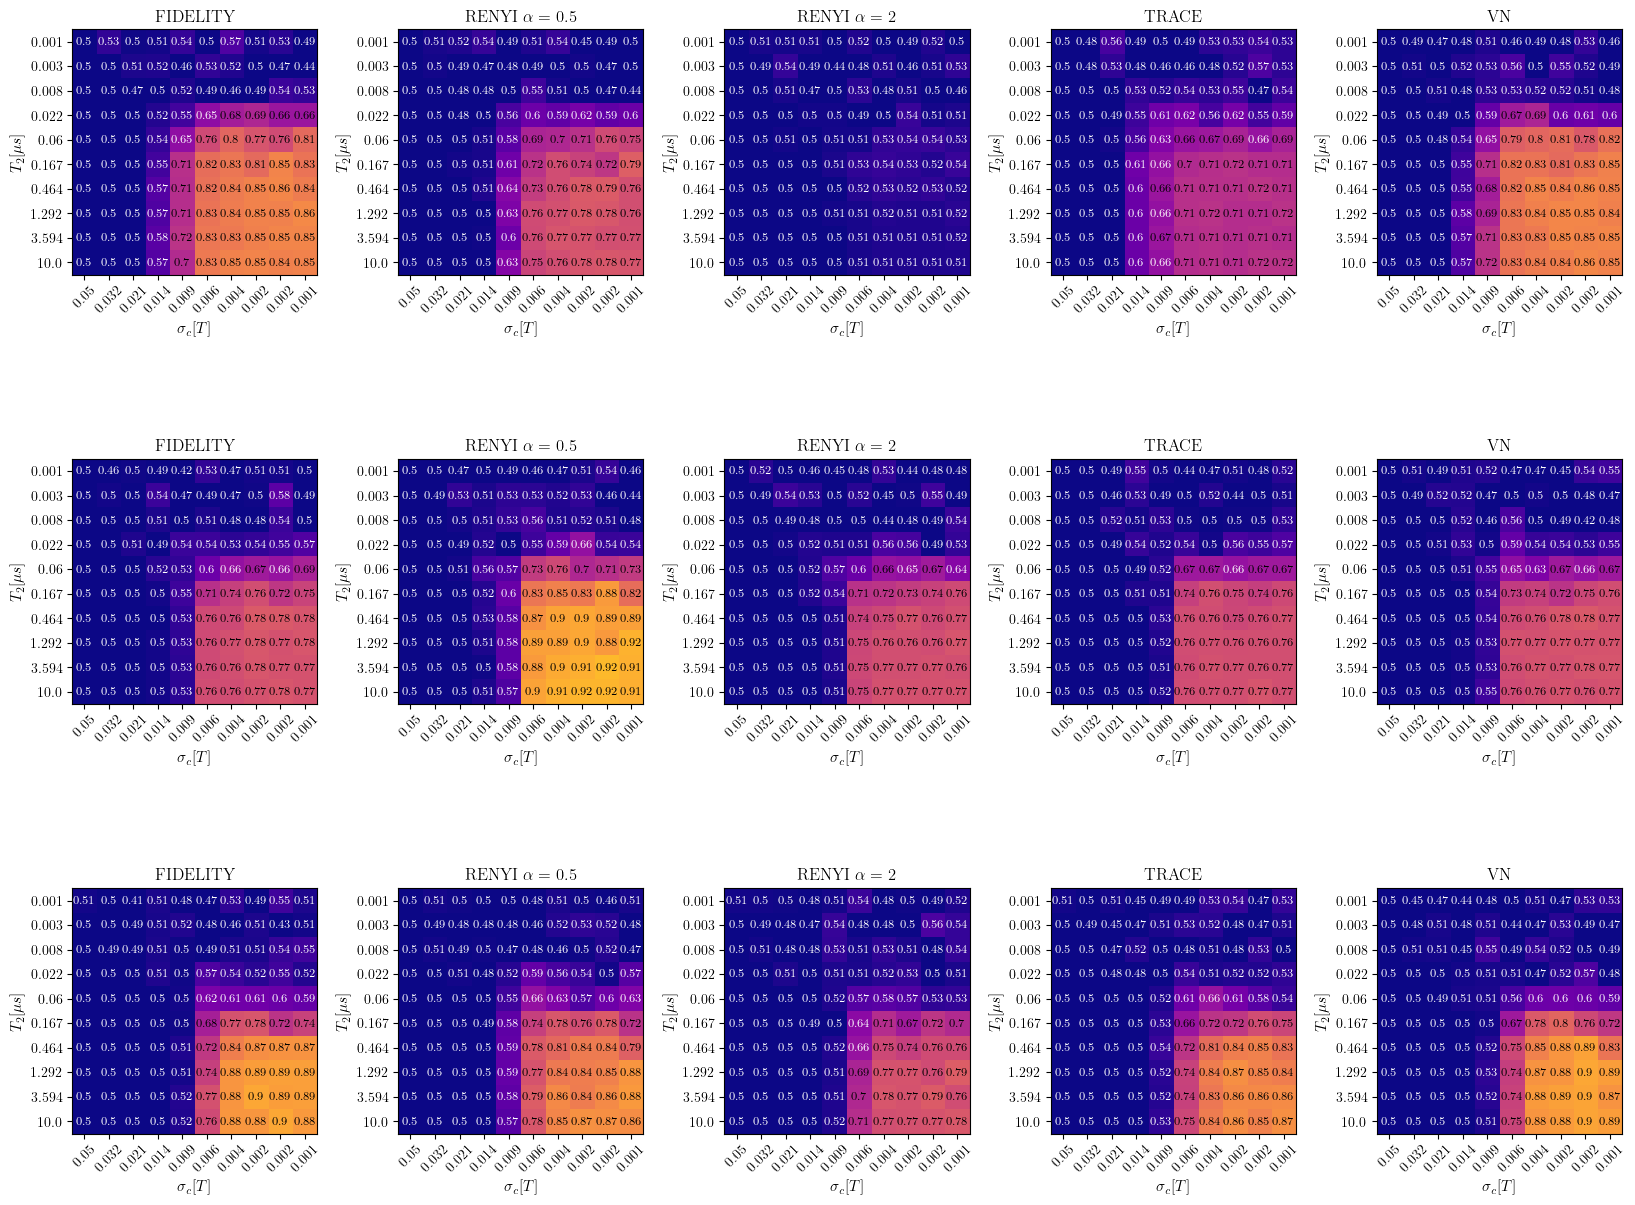

In [94]:
# 4Q-e:
paths = ['resultados_4q_kaggle_entenglament/3Layers/' ,
         'resultados_4q_kaggle_entenglament/5Layers/' ,
         'resultados_4q_kaggle_entenglament/10Layers/' ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [path_relative + path_i for path_i in paths]

make_plots_layers(paths, "4qe")
make_plots_layers_2(paths, "4qe")

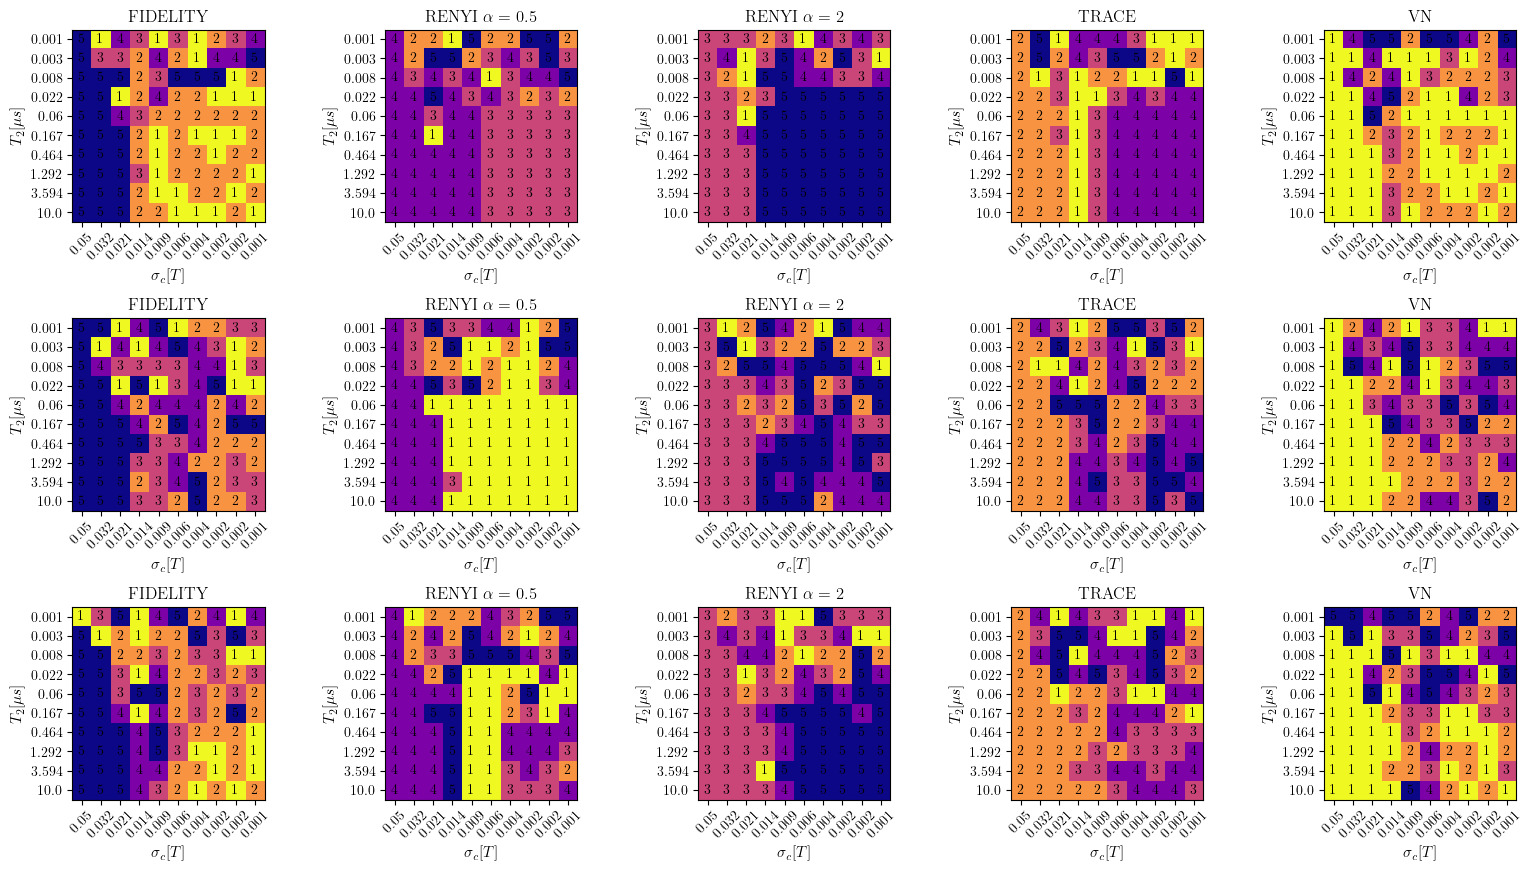

In [16]:
# 4Q-e:
paths = [['resultados_4q_kaggle_entenglament/3Layers/'], 
         ['resultados_4q_kaggle_entenglament/5Layers/'],
        ['resultados_4q_kaggle_entenglament/10Layers/'] ]

path_relative = "results_of_test/test_5/results_of_benchmarks/"
paths = [[path_relative + path_i[0]] for path_i in paths]

make_plots_layers_rankings(paths, "4qe")